In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

class.csv
zoo.csv



In [2]:
#from pandas_confusion import ConfusionMatrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('../input/zoo.csv')
print(df.shape)
cols = df.columns.tolist

df = sk.utils.shuffle(df)
#df = df.reindex(index=range(df.index.size))
df.head()


(101, 18)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
84,squirrel,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,1
38,herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
83,sparrow,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2


In [4]:
testCarogna = pd.DataFrame(columns=df.columns,dtype=int)
rowRemove = []
for i in range(1,8):
    for index,row in df.iterrows():
        if (row[17]==i and row[13]!=5 and row[0]!='frog'):
            testCarogna.loc[i]= row
            rowRemove.append(index)
            i=i+1
            break

df.drop(rowRemove, inplace=True)
testCarogna

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
1,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
2,sparrow,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
3,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
5,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5
6,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
7,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [5]:
cols = df.columns.tolist
cols

<bound method Index.tolist of Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 84 to 16
Data columns (total 18 columns):
animal_name    94 non-null object
hair           94 non-null int64
feathers       94 non-null int64
eggs           94 non-null int64
milk           94 non-null int64
airborne       94 non-null int64
aquatic        94 non-null int64
predator       94 non-null int64
toothed        94 non-null int64
backbone       94 non-null int64
breathes       94 non-null int64
venomous       94 non-null int64
fins           94 non-null int64
legs           94 non-null int64
tail           94 non-null int64
domestic       94 non-null int64
catsize        94 non-null int64
class_type     94 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.0+ KB


In [7]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.436170,0.202128,0.563830,0.425532,0.234043,0.361702,0.542553,0.606383,0.829787,0.797872,0.085106,0.170213,2.840426,0.755319,0.138298,0.457447,2.744681
std,0.498568,0.403740,0.498568,0.497074,0.425669,0.483070,0.500857,0.491171,0.377835,0.403740,0.280536,0.377835,2.028311,0.432203,0.347063,0.500857,2.083918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


1    40
2    19
4    12
7     9
6     7
3     4
5     3
Name: class_type, dtype: int64

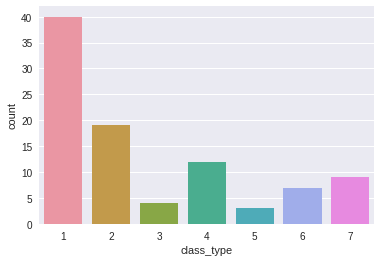

In [8]:
sns.countplot(df['class_type'])
pd.Series.value_counts(df['class_type'])
# 1 	40	Mammal
# 2 	19	Bird
# 3 	4	Reptile
# 4 	12	Fish
# 5 	3	Amphibian
# 6 	7	Bug
# 7 	9	Invertebrate

In [9]:
#knn 
from sklearn import neighbors

cols_X =['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']
cols_Y = ['class_type']

sco = []
scobru = []
sco_ = 0
bestk=0
for j in range(1,10):
    neigh = sk.neighbors.KNeighborsClassifier(n_neighbors=j)
    for i in range(10):
        
        df_nn = sk.utils.shuffle(df)
        df_nn = df_nn.reset_index()
        df_nn = df_nn.drop('index',axis=1)
        
        #split 
        X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(
        df_nn[cols_X], df_nn[cols_Y], test_size=0.3, random_state=10)
        #knn
        neigh.fit(X_train, y_train.values.ravel())
        predict = neigh.predict(X_test)
        sco.append(neigh.score(X_test,y_test))
        #val_sco = cross_val_score(neigh, X = df_nn[cols_X], y = df_nn[cols_Y])
        #sco.append(np.mean(val_sco))
    if(np.mean(sco)>sco_):
        bestk = j
        sco_ = np.mean(sco)
    #print("ksco: "+str(np.mean(sco)))
    sco.clear
print("best k: "+str(bestk))
neigh = sk.neighbors.KNeighborsClassifier(n_neighbors=bestk)

sco = []
for i in range(100):
    
    df_nn = sk.utils.shuffle(df)
    #df_nn = df_nn.reset_index()
    #df_nn = df_nn.drop('index',axis=1)
    
    #split 
    X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(
    df_nn[cols_X], df_nn[cols_Y], test_size=0.3, random_state=2*i)
    #knn
    neigh.fit(X_train, y_train.values.ravel()) 

    predict = neigh.predict(X_test)
    sco.append(neigh.score(X_test,y_test))
    if(neigh.score(X_test,y_test)<0.9):
        y_test_err = y_test
    ##predict = neigh.predict(testCarogna[cols_X])
    ##scobru.append(neigh.score(testCarogna[cols_X],testCarogna[cols_Y]))
print("score x_test: "+str(np.mean(sco)))

best k: 1
score x_test: 0.951379310345


In [10]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 14 , 12 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 8 }
    )

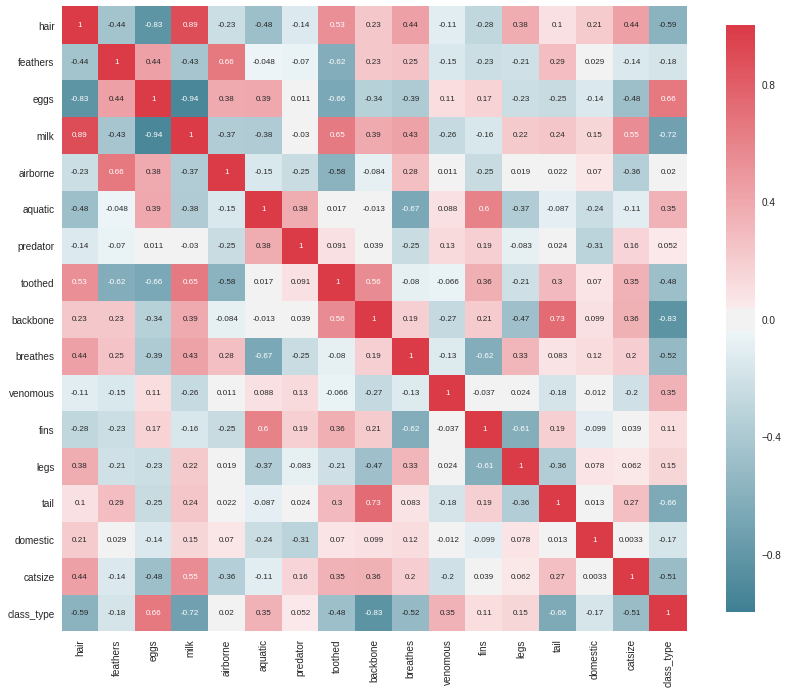

In [11]:
# CORRELATION MATRIX  
plot_correlation_map(df)


Confusion matrix, without normalization
[[5 2 2 0 1 0]
 [4 1 1 0 0 0]
 [0 1 0 1 1 1]
 [1 1 0 0 1 0]
 [0 1 0 0 0 0]
 [3 0 0 1 1 0]]


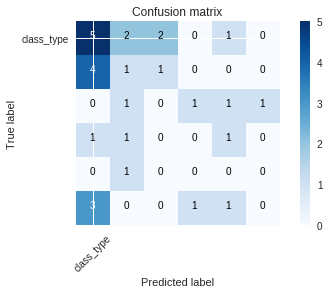

In [12]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# CONFUSION MATRIX  - use test_err
    #from pandas_ml import ConfusionMatrix
    #from pandas_confusion import ConfusionMatrix
from sklearn.metrics import confusion_matrix
p= pd.DataFrame(predict,dtype=int, index=y_test_err.index)
p.columns = ['pred']
confusion_matrix = confusion_matrix(y_test_err['class_type'], p['pred'])
#print("Confusion matrix:\n%s" % confusion_matrix)
plot_confusion_matrix(confusion_matrix, classes=cols_Y)

In [13]:
#'legs' -> dummy

df_legs = pd.DataFrame()
df_legs = pd.get_dummies(df['legs'],sparse=True)
colsLegs = ['legs0','legs2','legs4','legs5','legs6','legs8']
df_legs.columns = colsLegs
df_legs.head()


,legs0,legs2,legs4,legs5,legs6,legs8
84,0,1,0,0,0,0
37,0,1,0,0,0,0
61,1,0,0,0,0,0
45,0,0,1,0,0,0
33,0,1,0,0,0,0


In [14]:
# output dummy 

df_class = pd.DataFrame()
df_class = pd.get_dummies(df['class_type'],sparse=True)
colsName = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate']
df_class.columns = colsName
df_class.head()

,Mammal,Bird,Reptile,Fish,Amphibian,Bug,Invertebrate
84,1,0,0,0,0,0,0
37,0,1,0,0,0,0,0
61,0,0,0,1,0,0,0
45,1,0,0,0,0,0,0
33,0,1,0,0,0,0,0


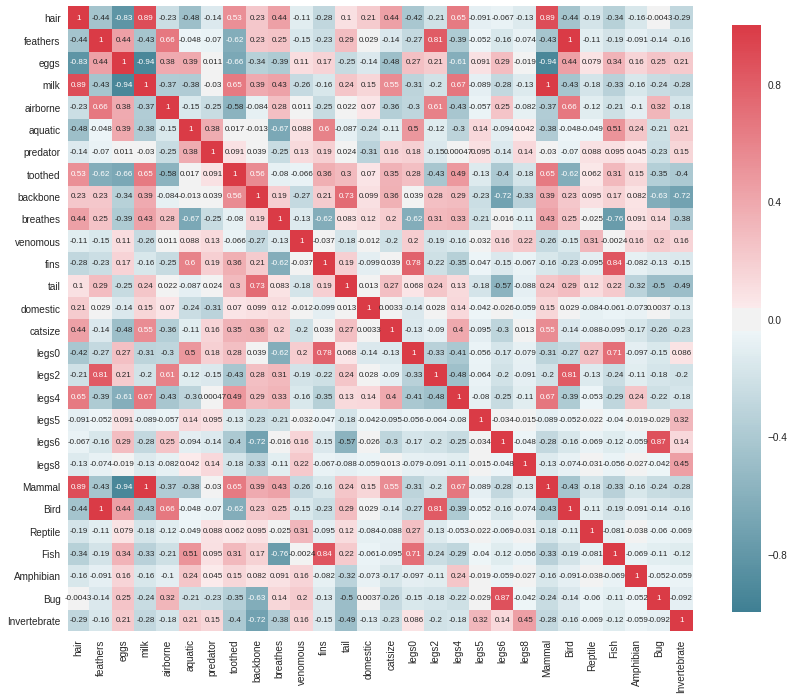

In [15]:
df_corr = df.join(df_legs)
df_corr = df_corr.join(df_class)
df_corr = df_corr.drop(['legs'],axis=1)
df_corr = df_corr.drop(['class_type'],axis=1)

plot_correlation_map(df_corr) 

In [16]:
# df_n

df_n = df.join(df_legs)
df_n = df_n.drop(['legs'],axis=1)
df_n = df_n.drop(['legs4'],axis=1)

df_n.head()

df_n  = df_n.drop(['animal_name'],axis=1)
df_n = df_n.astype(int)

#new coolumns
l = df_n.columns.tolist
colsX_ = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs0','legs2','legs5','legs6','legs8', 'tail', 'domestic', 'catsize']
colsY = ['class_type']
print(l)

<bound method Index.tolist of Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
       'domestic', 'catsize', 'class_type', 'legs0', 'legs2', 'legs5', 'legs6',
       'legs8'],
      dtype='object')>


In [17]:
# FEATURES SELECTION
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear",C=0.01) #Penalty parameter C of the error term.
#nvb = MultinomialNB(alpha=0.5)
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')

n_fest_opt:
20
best c value:
0.001
0.01
0.1
1
nfeat:
17
nfeat:
13
nfeat:
8
[False  True False  True False  True False False  True  True False  True
 False False False  True False  True False False]
(20,)
Optimal number of features : 8


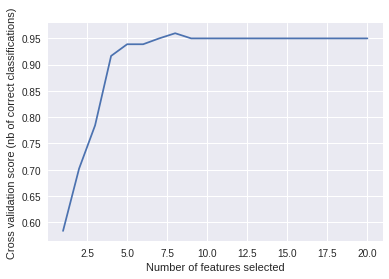

list of best features: ['feathers', 'milk', 'aquatic', 'backbone', 'breathes', 'fins', 'legs6', 'tail']


In [18]:
rfecv.fit(df_n[colsX_], df_n[colsY].values.ravel())
rfopt = rfecv
n_fest_opt = rfecv.n_features_
df_nn = df_n
rfopt_sup = rfecv.support_
rfopt_grid = rfecv.grid_scores_ 
print ('n_fest_opt:')
print (n_fest_opt)
cBest = 0.1
cScore = 0

print('best c value:' )
#set c
for c in [0.001,0.01,0.1,1,10,100,1000]:
    svc.C=c
    rfecv.fit(df_n[colsX_], df_n[colsY].values.ravel())
    if(rfecv.score(df_n[colsX_], df_n[colsY])>cScore):
        print(c)
        cBest = c
        cScore = rfecv.score(df_n[colsX_], df_n[colsY])

svc.C = cBest

# rfecv 10 times
for k in range(10):
    df_n = sk.utils.shuffle(df_n)
    #df_n = df_n.reset_index()
    #df_n = df_n.drop('index',axis=1)
    
    rfecv.fit(df_n[colsX_], df_n[colsY].values.ravel())
    if(rfecv.n_features_<n_fest_opt and rfecv.score(df_n[colsX_], df_n[colsY])>0.8):
        print("nfeat:")
        print(rfecv.n_features_)
        df_nn = df_n
        rfopt_sup = rfecv.support_
        rfopt_grid = rfecv.grid_scores_      
        n_fest_opt = rfecv.n_features_

#best features 
colsXopt = []
mask = rfopt_sup
print(mask)
print(mask.shape)
for i in range(len(mask)):
    if (mask[i] == True):
        colsXopt.append(colsX_[i])

print("Optimal number of features : %d" % n_fest_opt)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfopt_grid) + 1), rfopt_grid)
plt.show()
print("list of best features: "+str(colsXopt))

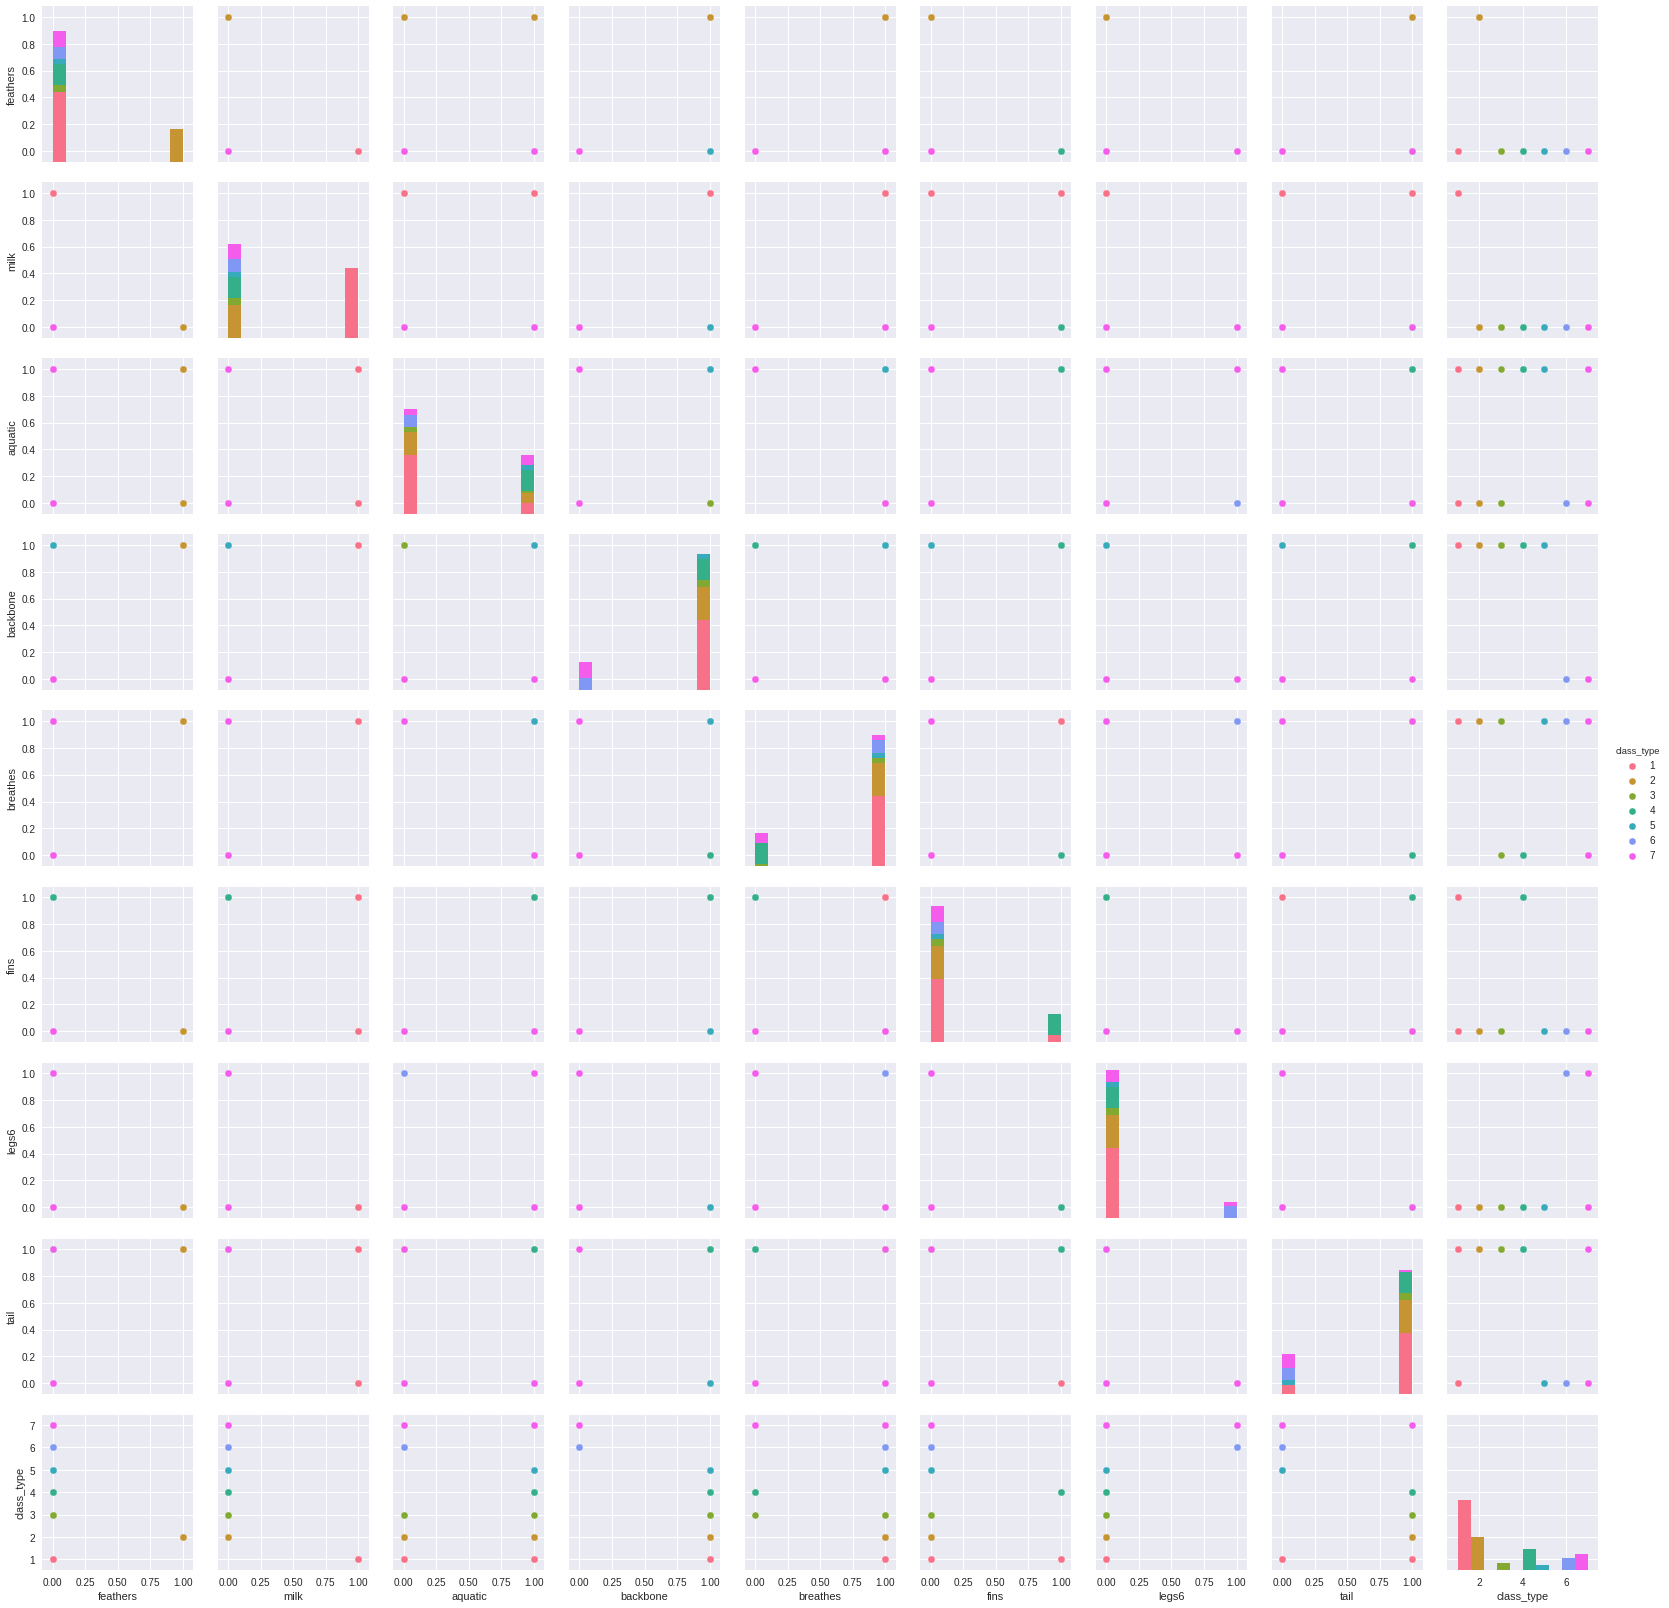

In [19]:
# PAIRPLOT (best features)

c = colsXopt.copy()
c.append('class_type')
sns.pairplot(df_n[c],hue='class_type')


In [20]:
# repeat knn ('legs' is dummy, best features )

sco = []
stop = 0
print('some wrong predictions:')
for i in range(100):
    df_nn = sk.utils.shuffle(df_n)
        #df_nn = df_nn.reset_index()
        #df_nn = df_nn.drop('index',axis=1)
    #split 
    X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(
    df_nn[colsXopt], df_nn[colsY], test_size=0.3, random_state=10)
    #knn
    neigh.fit(X_train, y_train.values.ravel()) 

    predict = neigh.predict(X_test)
    sco.append(neigh.score(X_test,y_test))
    
    if(neigh.score(X_test,y_test)<1):
        tmp = df.drop(['class_type'],axis=1)
        #print(y_test.index)
        #print(pd.DataFrame(predict))
        p = pd.DataFrame(predict,dtype=int, index=y_test.index)
        y_test['predict'] = p
        tmp = tmp.join(y_test,how='inner')
        #print(tmp.shape)
        for i in range(tmp.shape[0]):
            if (tmp.iloc[i][17] != tmp.iloc[i][18] and stop<10):
                stop = stop +1 
                print("  "+str(tmp.iloc[i][0]))
                print("     class_type: "+str(tmp.iloc[i][17]) )
                print("     predict: "+str(tmp.iloc[i][18]) )
print("\nscore medio: ")
print(np.mean(sco))

some wrong predictions:
  seasnake
     class_type: 3
     predict: 4
  scorpion
     class_type: 7
     predict: 3
  seasnake
     class_type: 3
     predict: 4
  worm
     class_type: 7
     predict: 6
  seasnake
     class_type: 3
     predict: 4
  slug
     class_type: 7
     predict: 6
  seasnake
     class_type: 3
     predict: 4
  tortoise
     class_type: 3
     predict: 1
  pitviper
     class_type: 3
     predict: 1
  slowworm
     class_type: 3
     predict: 1

score medio: 
0.972413793103


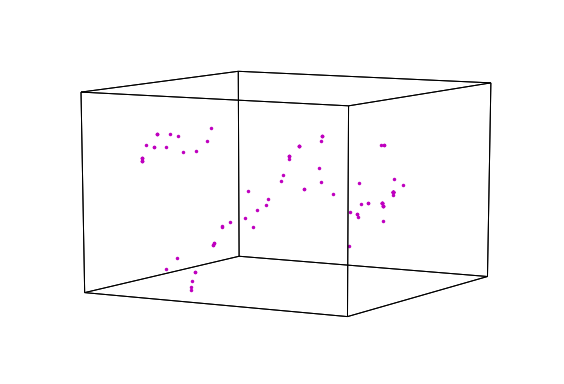

(<matplotlib.figure.Figure at 0x7f3d8ca2f080>,
 [array([[0, 1, 1, ..., 1, 0, 0],
         [1, 0, 0, ..., 1, 0, 0],
         [1, 0, 0, ..., 1, 0, 0],
         ..., 
         [1, 0, 0, ..., 1, 0, 1],
         [1, 0, 0, ..., 1, 1, 1],
         [1, 0, 1, ..., 1, 0, 1]])],
 None)

In [21]:
# knn graphics idea
import hypertools as hyp 
hyp.plot(df_n[colsX_],'m.')

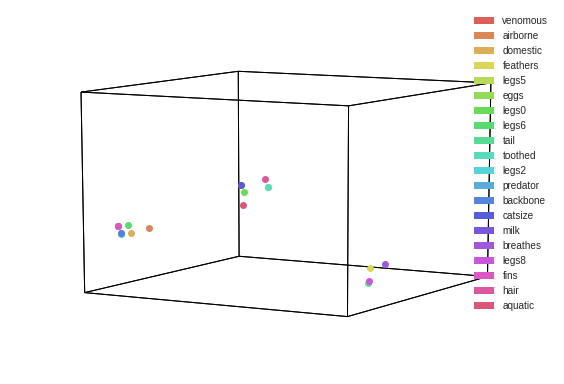

(<matplotlib.figure.Figure at 0x7f3d619fffd0>,
 [array([[0, 1, 1, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         ..., 
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0]])],
 None)

In [22]:
hyp.plot(df_n,'o', group=colsX_, legend=list(set(colsX_)))

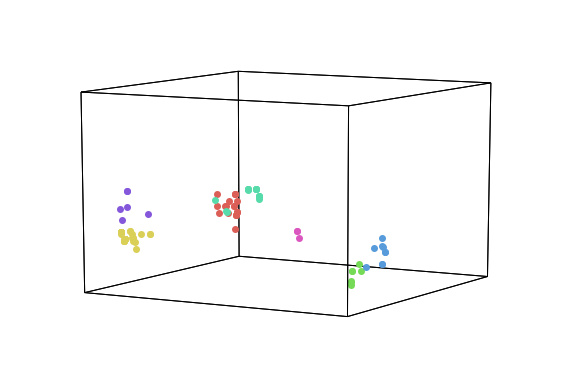

In [23]:
hyp.plot(df_n, 'o', n_clusters=7)

# you can also recover the cluster labels using the cluster tool
cluster_labels = hyp.tools.cluster(df_n, n_clusters=7, ndims=2) 


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


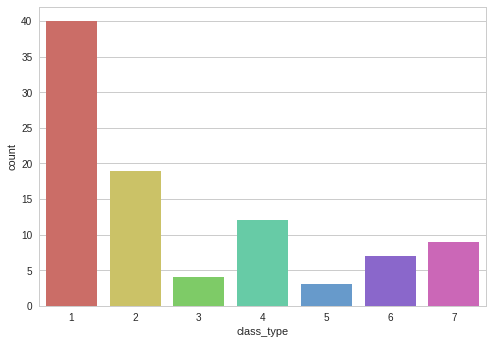

In [24]:
# balancing -> repeat samples: features are generic(deer and buffalo have the same values)

frog = df.loc[df['animal_name'] == 'frog']
sns.countplot(df['class_type'])

frog

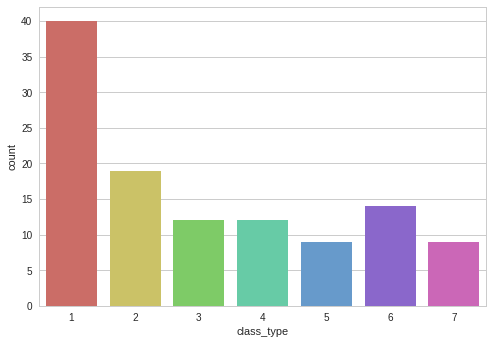

In [25]:
df_c3 = df_n.loc[df_n['class_type'] == 3]
df_c5 = df_n.loc[df_n['class_type'] == 5]
df_c6 = df_n.loc[df_n['class_type'] == 6]

df_adj = pd.concat([df_n,df_c3])
df_adj = pd.concat([df_adj,df_c3])
df_adj = pd.concat([df_adj,df_c5])
df_adj = pd.concat([df_adj,df_c5])
df_adj = pd.concat([df_adj,df_c6])

df_adj = sk.utils.shuffle(df_adj)


sns.countplot(df_adj['class_type'])

In [26]:
# repeat knn

sco = []
for i in range(1,20):
    #split 
    df_adj = sk.utils.shuffle(df_adj)
    #df_adj = df_adj.reset_index()
    #df_adj = df_adj.drop('index',axis=1)

    X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(
    df_adj[colsXopt], df_adj[colsY], test_size=0.3, random_state=42)
    #knn
    neigh.fit(X_train, y_train.values.ravel()) 

    predict = neigh.predict(X_test)
    sco.append(neigh.score(X_test,y_test))
    print("score: "+str(neigh.score(X_test,y_test)))
    if(neigh.score(X_test,y_test)<1):
        tmp = df.drop(['class_type'],axis=1)
        #print(y_test.index)
        #print(pd.DataFrame(predict))
        p = pd.DataFrame(predict,dtype=int, index=y_test.index)
        y_test['predict'] = p
        tmp = tmp.join(y_test,how='inner')
        #print(tmp.shape)
        for i in range(tmp.shape[0]):
            if (tmp.iloc[i][17] != tmp.iloc[i][18]):
                print("  "+str(tmp.iloc[i][0]))
                print("     class_type: "+str(tmp.iloc[i][17]) )
                print("     predict: "+str(tmp.iloc[i][18]) )
                
    
    
print("---")
print("score medio: "+str(np.mean(sco)))
print("---")
print("last prediction: ")
tmp

score: 1.0
score: 0.971428571429
  scorpion
     class_type: 7
     predict: 3
score: 0.914285714286
  seasnake
     class_type: 3
     predict: 4
  seasnake
     class_type: 3
     predict: 4
  seasnake
     class_type: 3
     predict: 4
score: 1.0
score: 1.0
score: 1.0
score: 1.0
score: 0.971428571429
  scorpion
     class_type: 7
     predict: 3
score: 1.0
score: 1.0
score: 1.0
score: 1.0
score: 1.0
score: 1.0
score: 0.914285714286
  scorpion
     class_type: 7
     predict: 3
  slug
     class_type: 7
     predict: 6
  worm
     class_type: 7
     predict: 6
score: 1.0
score: 1.0
score: 1.0
score: 0.914285714286
  scorpion
     class_type: 7
     predict: 3
  slug
     class_type: 7
     predict: 6
  worm
     class_type: 7
     predict: 6
---
score medio: 0.983458646617
---
last prediction: 


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,predict
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,2
19,dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,1
22,elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,6
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5,5
27,fruitbat,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1,1
32,gorilla,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,1,1
33,gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2,2
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,4


In [27]:
df_adj = df_adj.reset_index()
df_adj = df_adj.drop('index',axis=1)

In [28]:
df_legs = pd.get_dummies(testCarogna['legs'],sparse=True)

df_legs = df_legs.rename_axis({0.0: "legs0", 2.0: "legs2",4.0: "legs4",5.0: "legs5",6.0: "legs6",8.0: "legs8"}, axis="columns")

testCarogna = testCarogna.join(df_legs)
testCarogna = testCarogna.drop(['legs'],axis=1)
testCarogna = testCarogna.drop(['legs4'],axis=1)
testCarogna

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize,class_type,legs0,legs2,legs6
1,bear,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0
2,sparrow,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,2,0,1,0
3,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,3,0,0,0
4,herring,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,4,1,0,0
5,newt,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,5,0,0,0
6,housefly,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,6,0,0,1
7,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0


In [29]:
copt= colsXopt.copy()
if 'legs0' in copt:
    copt.remove('legs0')
    copt.append(0.0)
if 'legs2' in copt:
    copt.remove('legs2')
    copt.append(2.0)
if 'legs5' in copt:
    copt.remove('legs5')
    copt.append(5.0)
if 'legs6' in copt:
    copt.remove('legs6')
    copt.append(6.0)
if 'legs8' in copt:
    copt.remove('legs8')
    copt.append(8.0)

    
print('col opt:')    
print(copt)

###--------------------------



col opt:
['feathers', 'milk', 'aquatic', 'backbone', 'breathes', 'fins', 'tail', 6.0]


In [30]:
predict = neigh.predict(testCarogna[colsXopt])
#print("score: "+str(neigh.score(testCarogna[colsXopt],testCarogna[colsY])))

p= pd.DataFrame(predict,dtype=int, index=testCarogna.index)
p.columns = ['pred']
print('testCarogna prediction:')
print( p)
#cm(y_test, y_pred)
#---confusion_matr = confusion_matrix(testCarogna['class_type'],p['pred'])
#print("Confusion matrix:\n%s" % confusion_matrix)
#---plot_confusion_matrix(confusion_matr, classes=colsY)
#plt.show()

testCarogna[colsXopt].astype(int)
testCarogna

testCarogna prediction:
   pred
1     1
2     2
3     3
4     4
5     5
6     6
7     7


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize,class_type,legs0,legs2,legs6
1,bear,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0
2,sparrow,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,2,0,1,0
3,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,3,0,0,0
4,herring,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,4,1,0,0
5,newt,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,5,0,0,0
6,housefly,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,6,0,0,1
7,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0


In [31]:
print(df_adj.columns.tolist)
print(testCarogna.columns.tolist)

<bound method Index.tolist of Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
       'domestic', 'catsize', 'class_type', 'legs0', 'legs2', 'legs5', 'legs6',
       'legs8'],
      dtype='object')>
<bound method Index.tolist of Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'tail', 'domestic', 'catsize', 'class_type', 'legs0', 'legs2',
       'legs6'],
      dtype='object')>


In [32]:
df_union = pd.concat([df_adj[colsXopt],testCarogna[colsXopt]],ignore_index=True)
df_union_target = pd.concat([df_adj[colsY],testCarogna[colsY]],ignore_index=True)

df_union.head()

,feathers,milk,aquatic,backbone,breathes,fins,legs6,tail
0,0,0,1,1,0,1,0,1
1,0,0,0,1,1,0,0,1
2,0,0,1,1,1,0,0,0
3,0,0,1,1,0,0,0,1
4,0,1,0,1,1,0,0,0


In [33]:
#-----------------------------------------------------------------------------
#------------------------PCA SU df_n con colsXopt-----------------------------
#-----------------------------------------------------------------------------
from sklearn.decomposition import PCA

In [34]:
scaler = StandardScaler().fit(df_union)
zoo_scaled = scaler.transform(df_union)

print(zoo_scaled[:,0].mean())  # zero (or very close)
print(zoo_scaled[:,0].std())  # 1 (or very close)


8.09916796653e-17
1.0


In [35]:
pca = PCA(n_components=0.9)  # consider enough components to explain 90% of the variance
pca.fit(zoo_scaled)
pcscores = pd.DataFrame(pca.transform(zoo_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings = pd.DataFrame(pca.components_, columns=colsXopt)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

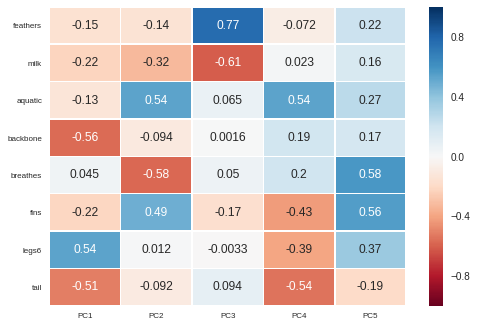

In [36]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)


In [37]:
pcscores.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.428222,3.297785,-0.285825,-0.851159,0.126361
1,-0.423566,-0.698877,0.202417,-0.242958,-0.547079
2,0.404838,0.616969,0.137140,2.045249,0.416336
3,-0.800604,1.893664,0.209071,0.379092,-1.479705
4,0.198615,-1.186812,-1.281392,0.970853,0.201895


In [38]:
# knn following pca
sco = []
print(X_train.columns)
print(y_test.columns)
for i in range(1,100):

   
    #split 
    X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(
        pcscores, df_union_target, test_size=0.2, random_state=42*i)
    #knn
    
    #neigh.fit(X_train, y_train) 
    #np.asarray(train['P1'], dtype="|S6")
    neigh.fit(X_train, np.asarray(y_train['class_type'], dtype="|S6"))

    predict = neigh.predict(X_test)
    sco.append((neigh.score(X_test,np.asarray(y_test['class_type'], dtype="|S6"))))
print("score: "+str(np.mean(sco)))


Index(['feathers', 'milk', 'aquatic', 'backbone', 'breathes', 'fins', 'legs6',
       'tail'],
      dtype='object')
Index(['class_type', 'predict'], dtype='object')
score: 0.97898989899


In [39]:
# cambio valori a n_components, ora ho provato con 90% della varianza magari usando un numero diverso di 
# features(output) diverso le cose migliorano.
# ottengo comunque score più bassi di prima

n_feat = []

print("cambio valori a n_components")
for j in range(1,len(colsXopt)):
    pca = PCA(n_components=j)  # consider enough components to explain 80% of the variance
    pca.fit(zoo_scaled)
    pcscores = pd.DataFrame(pca.transform(zoo_scaled))
    pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
    loadings = pd.DataFrame(pca.components_, columns=colsXopt)
    loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

    sco = [];
    for r in range(1,100):

        #split 
        X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(
        pcscores, df_union_target, test_size=0.2, random_state=42*r)
        #knn
        neigh.fit(X_train,np.asarray(y_train['class_type'], dtype="|S6")) 

        predict = neigh.predict(X_test)
        sco.append((neigh.score(X_test,np.asarray(y_test['class_type'], dtype="|S6"))))
    print("score con  "+str(j)+" features")
    print(np.mean(sco))
    n_feat.append(np.mean(sco))
print("array di score: ")
print(n_feat)

cambio valori a n_components
score con  1 features
0.96
score con  2 features
0.966868686869
score con  3 features
0.999191919192
score con  4 features
0.978181818182
score con  5 features
0.97898989899
score con  6 features
0.997575757576
score con  7 features
0.992323232323
array di score: 
[0.96000000000000008, 0.96686868686868688, 0.99919191919191919, 0.97818181818181804, 0.97898989898989885, 0.99757575757575745, 0.99232323232323238]


In [40]:
opt_feat = 0
maxind = 0
for i in range(len(n_feat)):
        if(n_feat[i]>opt_feat):
            opt_feat=n_feat[i]
            maxind = i+1
        
opt_feat

0.99919191919191919

In [41]:
df_pca = pcscores.iloc[:115, :maxind]
testCarogna_pca = pcscores.iloc[115:, :maxind]

df_pca_target = df_union_target.iloc[:115, :]
testCarogna_pca_target = df_union_target.iloc[115:, :]

testCarogna_pca

,PC1,PC2,PC3
115,0.198615,-1.186812,-1.281392
116,-0.828519,-1.086105,2.273210
117,-0.423566,-0.698877,0.202417
118,-1.428222,3.297785,-0.285825
119,-0.684505,0.419821,0.337831
120,3.611555,-0.233642,-0.011685
121,1.947957,1.204433,-0.130967


In [42]:
pca = PCA(n_components=maxind)  # consider enough components to explain 80% of the variance
pca.fit(zoo_scaled)
pcscores = pd.DataFrame(pca.transform(zoo_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings = pd.DataFrame(pca.components_, columns=colsXopt)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

#split 
X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(
pcscores, df_union_target, test_size=0.2, random_state=42*r)
#knn
neigh.fit(X_train, np.asarray(y_train['class_type'], dtype="|S6")) 

predict = neigh.predict(X_test)
print("score di test con  "+str(maxind)+" features:")
print((neigh.score(X_test,np.asarray(y_test['class_type'], dtype="|S6"))))
#print (testCarogna_pca.shape)
#print (X_test.shape)

predict = neigh.predict(testCarogna_pca)
print("score di testCarogna: "+str(neigh.score(testCarogna_pca,np.asarray(testCarogna_pca_target['class_type'], dtype="|S6"))))
                                               #testCarogna_pca_target)))
testCarogna_pca

score di test con  3 features:
1.0
score di testCarogna: 1.0


,PC1,PC2,PC3
115,0.198615,-1.186812,-1.281392
116,-0.828519,-1.086105,2.273210
117,-0.423566,-0.698877,0.202417
118,-1.428222,3.297785,-0.285825
119,-0.684505,0.419821,0.337831
120,3.611555,-0.233642,-0.011685
121,1.947957,1.204433,-0.130967


In [43]:
#-----------------------------------------------------------------------------
#------------------------BATTLE OF ALGORITHMS--------------------------------- su pca
#-----------------------------------------------------------------------------

from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [44]:
# dataset for battle
X_train, X_test, y_train, y_test = sk.cross_validation.train_test_split(
    df_pca, df_pca_target, test_size=0.3, random_state=40)


In [45]:
# sklearn.svm.SVC

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, np.asarray(y_train['class_type'], dtype="|S6")) 

clf.predict(X_test)
print("score svm: "+str(clf.score(X_test,np.asarray(y_test['class_type'], dtype="|S6"))))

clf.predict(testCarogna_pca)
print("score svm di testCarogna: "+str(clf.score(testCarogna_pca,np.asarray(testCarogna_pca_target['class_type'], dtype="|S6"))))


score svm: 1.0
score svm di testCarogna: 0.857142857143


In [46]:
# sklearn.svm.SVC --- weight

clf = svm.SVC(decision_function_shape='ovo', class_weight= 'balanced' )
# stampo pesi ottenuti con 'balanced', da documentazione
weigth_ = (df_adj.shape[1] / (7 * np.bincount(df_adj.class_type.values)))
weigth_ = weigth_[1:]
print(weigth_)

sampl_to_wei = []
for index,row in df.iterrows():
        if (row[17]==3 or row[17]==5 or row[17]==7):
            sampl_to_wei.append(row.index)
            
clf.fit(X_train,np.asarray(y_train['class_type'], dtype="|S6")) 

clf.predict(X_test)
print(clf.score(X_test,np.asarray(y_test['class_type'], dtype="|S6")))
    

clf.predict(testCarogna_pca)
print("score svm pesato di testCarogna: "+str(clf.score(testCarogna_pca,np.asarray(testCarogna_pca_target['class_type'], dtype="|S6"))))


[ 0.075       0.15789474  0.25        0.25        0.33333333  0.21428571
  0.33333333]
1.0
score svm pesato di testCarogna: 0.857142857143


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [47]:
 # sklearn.neural_network.MLPClassifier 
besti = 0
bestj = 0
bestsco = 0
for i in range(1,10):
        for j in range(1,10):
                clf = MLPClassifier(solver='lbfgs',activation = 'logistic', alpha=1e-5,
                                    hidden_layer_sizes=(j,i), random_state=1)
                sco = []
                for k in range(5):
                        XX_train, XX_test, yy_train, yy_test = sk.cross_validation.train_test_split(
                        df_pca, df_pca_target, test_size=0.3, random_state=40)
                        clf.fit(XX_train,np.asarray(yy_train['class_type'], dtype="|S6"))
                        clf.predict(XX_test)
                        sco.append(clf.score(XX_test,np.asarray(yy_test['class_type'], dtype="|S6")))
                if(np.mean(sco)>bestsco):
                    bestsco = np.mean(sco)
                    besti = i
                    bestj = j

print("best i: "+str(besti))
print("best j: "+str(bestj))
clf = MLPClassifier(solver='lbfgs', activation = 'logistic',alpha=1e-5,
                     hidden_layer_sizes=(bestj,besti), random_state=1)

clf.fit(X_train, np.asarray(y_train['class_type'], dtype="|S6")) 

clf.predict(X_test)
print(clf.score(X_test,np.asarray(y_test['class_type'], dtype="|S6")))

clf.predict(testCarogna_pca)
print("score reteneurale di testCarogna: "+str(clf.score(testCarogna_pca,np.asarray(testCarogna_pca_target['class_type'], dtype="|S6"))))

 

best i: 4
best j: 9
1.0
score reteneurale di testCarogna: 0.857142857143


In [48]:
# neural network autoset
clf = MLPClassifier(solver='lbfgs',activation = 'logistic', alpha=1e-5, shuffle=True,early_stopping=True,
                    validation_fraction = 0.2, random_state=1)

#print("autoset i: "+str(clf.hidden_layer_sizes))
#print("autoset j: "+str(clf.hidden_layer_sizes))

clf.fit(X_train, np.asarray(y_train['class_type'], dtype="|S6")) 

clf.predict(X_test)
print("score reteneurale: "+str(clf.score(X_test,np.asarray(y_test['class_type'], dtype="|S6"))))

clf.predict(testCarogna_pca)
print("score reteneurale di testCarogna: "+str(clf.score(testCarogna_pca,np.asarray(testCarogna_pca_target['class_type'], dtype="|S6"))))


score reteneurale: 1.0
score reteneurale di testCarogna: 0.857142857143


In [49]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, np.asarray(y_train['class_type'], dtype="|S6"))

clf.predict(X_test)
print("score GaussianNB: "+str(clf.score(X_test,np.asarray(y_test['class_type'], dtype="|S6"))))

clf.predict(testCarogna_pca)
print("score GaussianNB di testCarogna: "+str(clf.score(testCarogna_pca,np.asarray(testCarogna_pca_target['class_type'], dtype="|S6"))))


score GaussianNB: 1.0
score GaussianNB di testCarogna: 0.857142857143
